# Agenda, week 5: Visualization

1. How do we plot? Setting things up, and options
2. Line plots
3. Bar plots
4. Histograms
5. Pie plots
6. Scatter plots
7. Boxplots
8. What next?


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 100, [4, 5]),
              index=list('abcd'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,44,47,64,67,67
b,9,83,21,36,87
c,70,88,88,12,58
d,65,39,87,46,88


In [3]:
df.loc['b', 'x'] = np.nan

In [4]:
df.loc['b', 'y'] = np.nan

In [5]:
df.loc['c', 'v'] = np.nan

In [6]:
df.loc['d', 'v'] = np.nan
df.loc['a', 'z'] = np.nan

In [7]:
df

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [8]:
df.dropna()  # this removes any row with *any* NaN values

,v,w,x,y,z


In [9]:
df.dropna(thresh=2)  # drop any column that doesn't have two non-NaN values

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [11]:
df.dropna(thresh=4)  # drop any column that doesn't have four non-NaN values

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [14]:
# this gives me a boolean series, showing me non-NaN values in column 'v'
df['v'].notna()

a     True
b     True
c    False
d    False
Name: v, dtype: bool

In [15]:
# only show the rows in which 'v' doesn't have NaN
df.loc[df['v'].notna()]

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0


# Output from a groupby 



In [17]:
df['category'] = ['food', 'food', 'drink', 'drink']
df

,v,w,x,y,z,category
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [18]:
# for each distinct value of category
# show me the mean value of column 'z'

df.groupby('category')['z'].mean() # here, we get a series back 

category
drink    73.0
food     87.0
Name: z, dtype: float64

In [22]:
g_df = df.groupby('category')[['y', 'z']].mean() # here, we get a data frame back -- one column for x, one for y
g_df

,y,z
category,,
drink,29.0,73.0
food,67.0,87.0


In [23]:
g_df.index

Index(['drink', 'food'], dtype='object', name='category')

In [24]:
df

,v,w,x,y,z,category
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [25]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [26]:
df.index.name = 'surprise'

In [27]:
df

,v,w,x,y,z,category
surprise,,,,,,
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [20]:
# but does a groupby really give us a series or data frame?
# the answer depends on what you consider "groupby returning".

# if you go through the whole thing -- groupby(column)[other_columns].mean() -- then yes, we get
# a series or data frame

# but the return value from groupby is actually a special object

df.groupby('category')

# Visualization

Visualization is a critical part of data analysis, for several reasons:

1. If we have to present our results to non-mathematical types, they'll often appreciate having a visual aid, not just tables of numbers.
2. Guess what? Data analysts are humans, too, and understand visual data faster than mathematical tables, just like everyone else.
3. Because we analysts are humans, we can see a visual form and infer certain things from it, things that we might not notice or understand in a table of numbers. So it's also useful to visualize our data when we're analyzing it, to get a deeper understanding of relationships and values.
4. Often, our analysis will change, or benefit, after we've visualized the data in this way.

# Visualization toolkits and libraries

By far, the biggest and best known visualization library for data in Python is known as "matplotlib." Lots of people use it, because it's so flexible and so powerful.

However, I find it almost impossible to use and understand. 

Fortunately, Pandas comes with methods that invoke matplotlib for us, thus saving us from a lot of the problems associated with it. So we'll be doing visualization via Pandas, which will do the hard matplotlib work for us.

In [28]:
# start with plotting a series

np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
          index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<AxesSubplot: >

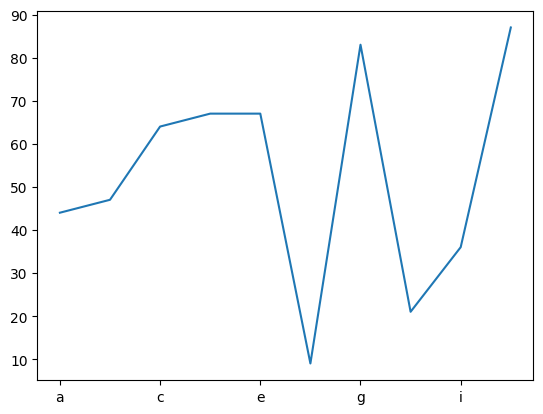

In [29]:
s.plot.line()    # plot is an attribute of our series, and also our gateway to using Matplotlib.

# we can call line() to create a line plot -- each of the values in our series will be plotted
# on the y axis, and the index will be used for the x axis.  

<AxesSubplot: title={'center': 'My amazing plot'}>

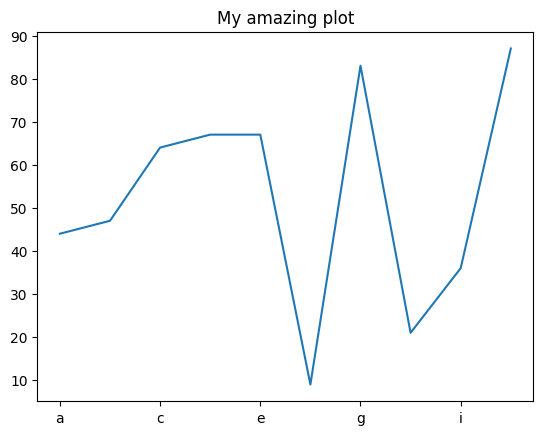

In [30]:
s.plot.line(title='My amazing plot') 

<AxesSubplot: title={'center': 'My amazing plot'}>

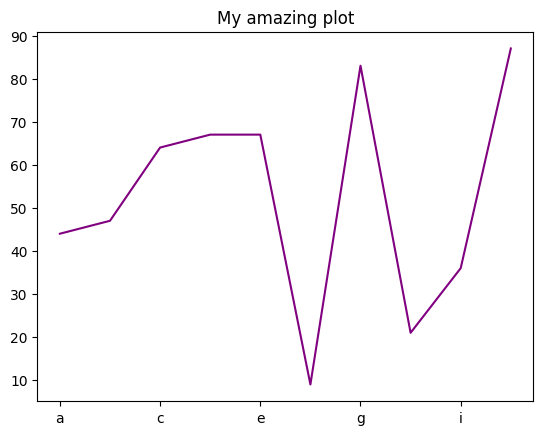

In [31]:
s.plot.line(title='My amazing plot', color='purple') 

<AxesSubplot: title={'center': 'My amazing plot'}>

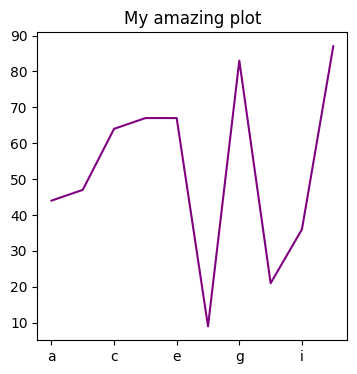

In [33]:
s.plot.line(title='My amazing plot', color='purple',
           figsize=(4,4))   # figsize gets a 2-element tuple with the width and height, in inches, of the plot

In [34]:
np.random.seed(0)

df = DataFrame(np.random.randint(0, 100, [3, 4]),
              index=list('abc'),
              columns=list('wxyz'))

df

,w,x,y,z
a,44,47,64,67
b,67,9,83,21
c,36,87,70,88


<AxesSubplot: >

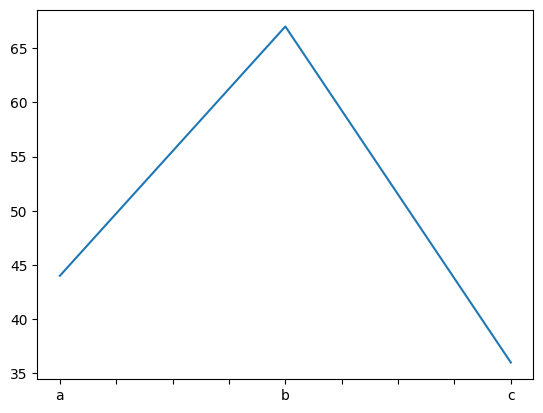

In [35]:
df['w'].plot.line()   # only plot column w

In [36]:
df.sum()

w    147
x    143
y    217
z    176
dtype: int64

<AxesSubplot: >

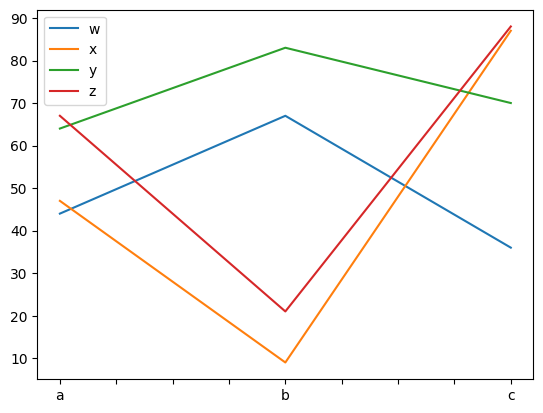

In [37]:
df.plot.line()   # this will plot a line for each of the columns in df

<AxesSubplot: >

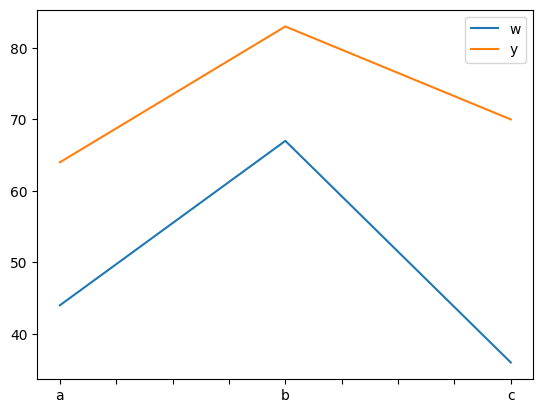

In [38]:
df[['w', 'y']].plot.line()   # this will plot a line for the w and y columns in df

In [40]:
!ls ../data/*,*.csv

../data/albany,ny.csv	    ../data/new+york,ny.csv
../data/boston,ma.csv	    ../data/san+francisco,ca.csv
../data/chicago,il.csv	    ../data/springfield,il.csv
../data/los+angeles,ca.csv  ../data/springfield,ma.csv


# Exercise: High and low temps

1. Load temperature data from Albany, NY (`albany,ny.csv` data file).  We're only interested in the columns for min temp C and max temp C. Make the date column into the index.
2. Plot the min temp on its own.
3. Plot the max temp on its own.
4. Plot both of them together, getting two lines on the same line plot.

In [50]:
df = pd.read_csv('/Users/reuven/Courses/Current/data/albany,ny.csv',
                usecols=[0, 1, 2],
                names=['date', 'maxtemp', 'mintemp'],
                header=0,
                parse_dates=[0],
                index_col='date')
df.head()

,maxtemp,mintemp
date,,
2018-12-11 00:00:00,-2,-8
2018-12-11 03:00:00,-2,-8
2018-12-11 06:00:00,-2,-8
2018-12-11 09:00:00,-2,-8
2018-12-11 12:00:00,-2,-8


In [47]:
df.shape

(728, 2)

<AxesSubplot: xlabel='date'>

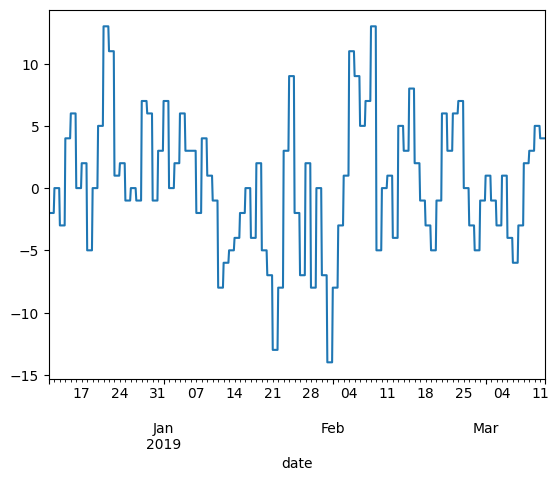

In [51]:
df['maxtemp'].plot.line()

<AxesSubplot: xlabel='date'>

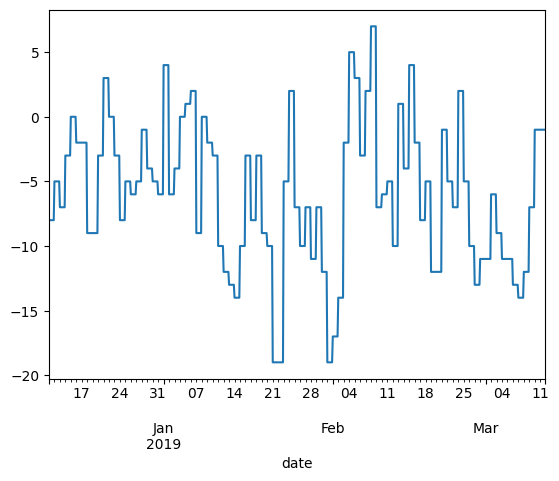

In [52]:
df['mintemp'].plot.line()

<AxesSubplot: xlabel='date'>

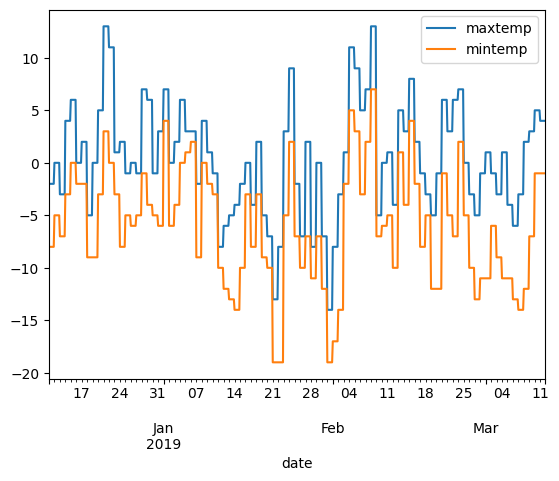

In [53]:
df.plot.line()

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

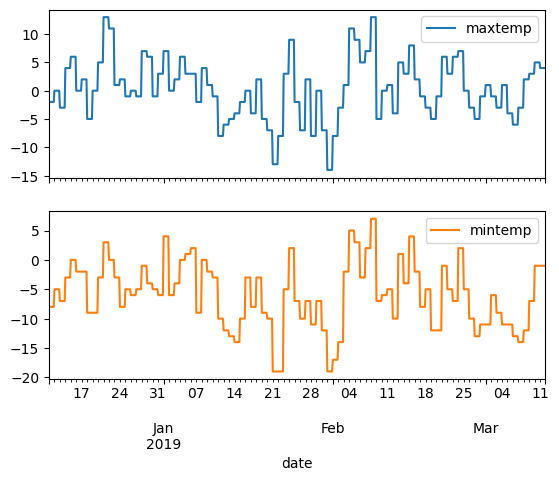

In [54]:
# we can have two separate line plots, one on top of the other, if we want
# them separate but parallel.  For this, we say subplots=True

df.plot.line(subplots=True)

<AxesSubplot: xlabel='date'>

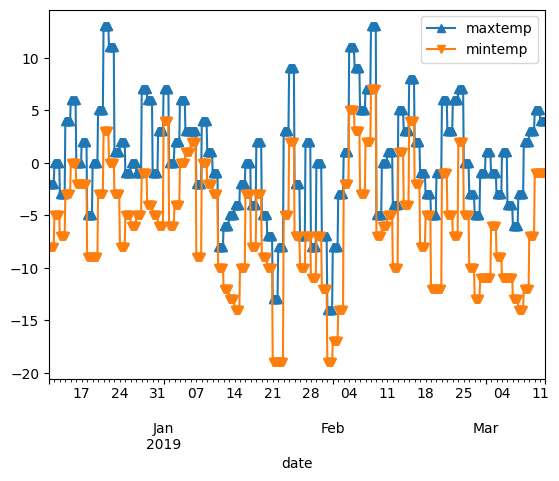

In [66]:
df.plot.line(style=['-^', '-v'])

# Bar plots

In a bar plot, we once again (as in a line plot) will put the index on the x axis. Each data point is drawn as a line (a bar, believe or not!) from the x axis up to the height needed on the y axis, starting from 0.

<AxesSubplot: xlabel='date'>

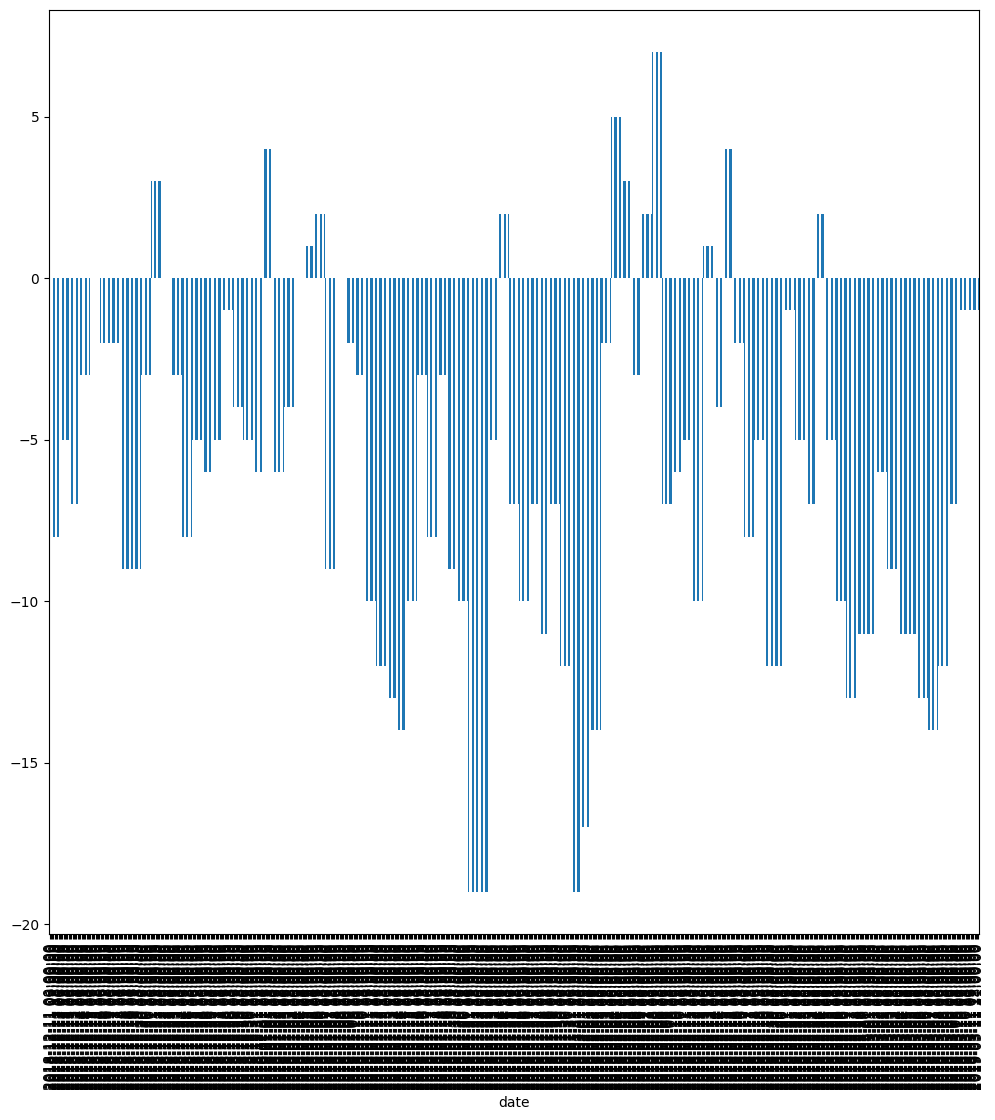

In [69]:
df['mintemp'].plot.bar(figsize=(12,12))

In [68]:
df.shape

(728, 2)

<AxesSubplot: xlabel='date'>

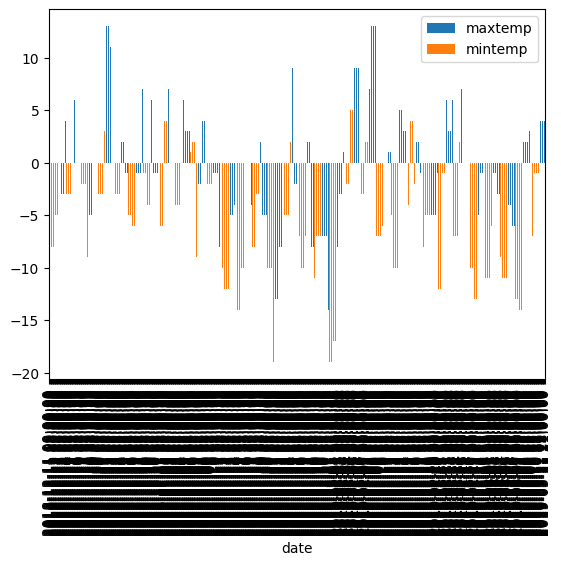

In [70]:
# let's plot the entire data frame, with both columns!

df.plot.bar()

<AxesSubplot: xlabel='date'>

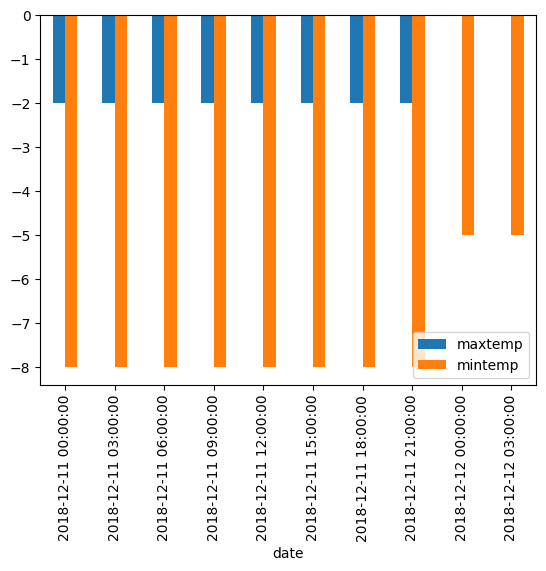

In [71]:
df[:10].plot.bar()

<AxesSubplot: ylabel='date'>

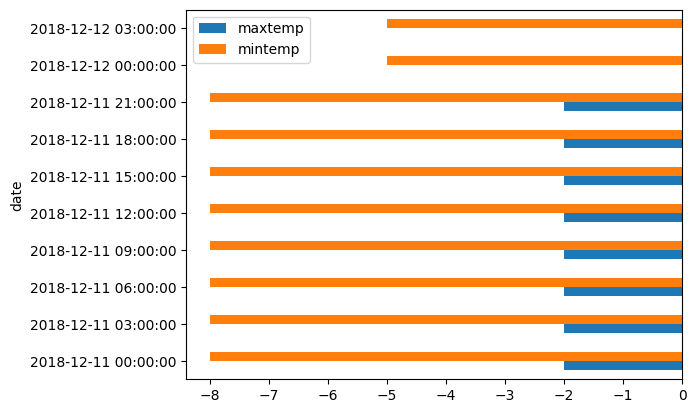

In [72]:
# sometimes, it's helpful to have a horizontal bar plot!

df[:10].plot.barh()

# Exercise: Taxi bar plots

1. Load the NYC taxi data for January 2019 into a data frame.  We'll want the following columns: fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, and `total_amount`.
2. Create a bar plot showing the `total_amount` for the first 50 cab rides in the data set.
3. Create a bar plot showing both `total_amount` and `tolls_amount` for the first 50 cab rides.

In [74]:
filename = '../data/nyc_taxi_2019-01.csv'

df = pd.read_csv(filename,
                usecols=['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'])

In [75]:
df.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,7.0,0.5,0.5,1.65,0.0,0.3,9.95
1,14.0,0.5,0.5,1.00,0.0,0.3,16.30
2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
3,3.5,0.5,0.5,0.00,0.0,0.3,7.55
4,52.0,0.0,0.5,0.00,0.0,0.3,55.55


In [76]:
df.shape

(7667792, 7)

<AxesSubplot: >

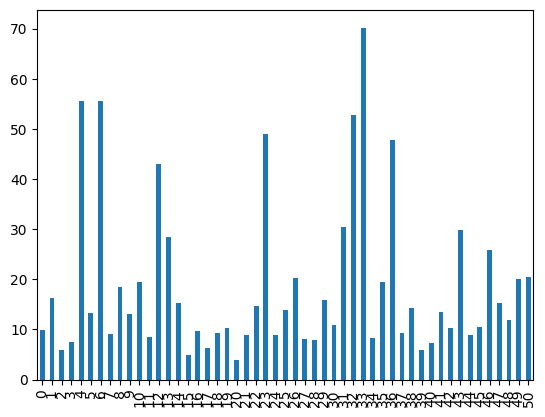

In [81]:
df.loc[:50, 'total_amount'].plot.bar()

<AxesSubplot: >

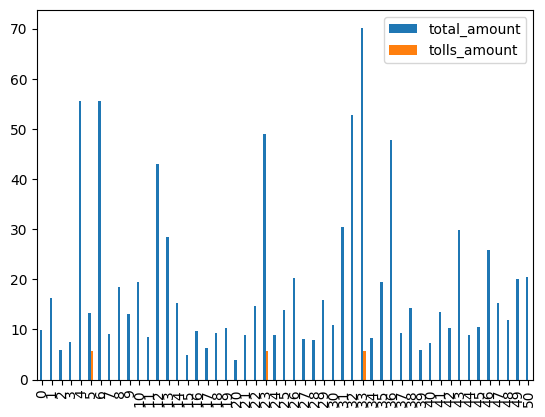

In [82]:
df.loc[:50, ['total_amount', 'tolls_amount']].plot.bar()

<AxesSubplot: >

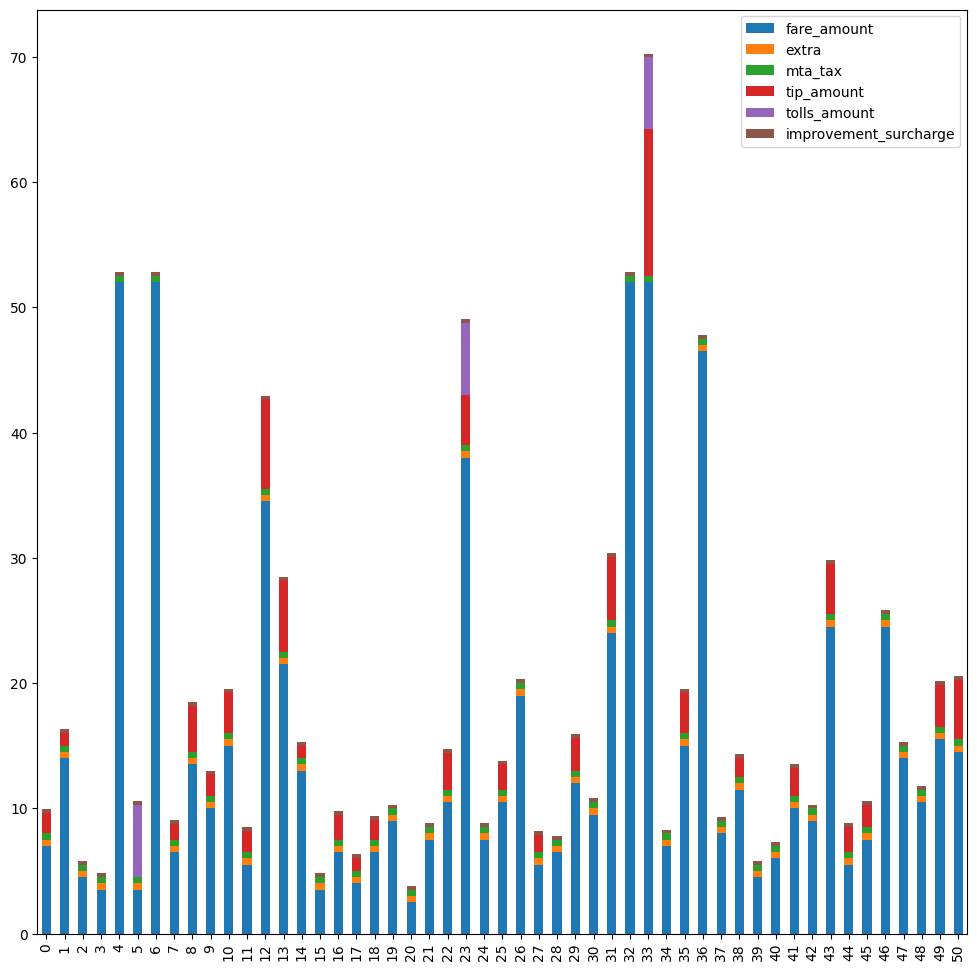

In [87]:
# Pandas bar plots can be "stacked" -- if we're running .plot.bar on a data frame,
# and the data frame has several columns, then we can ask for each of them to be put
# onto the *same* bar, stacked, to see the total amount

# I'm not going to plot total_amount now. Rather, I'll plot all of the other columns,
# and we'll be able to see how much of a contribute to the total amount each of 
# the components plays.

df.loc[:50, ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
             'tolls_amount', 'improvement_surcharge']].plot.bar(stacked=True, figsize=(12,12))

# Next up:

- Histograms
- Pie plots

# Histograms

We're often interested in knowing the *distribution* of values. That is: How often did we get a 10? How often 20? How often 25? How often 100? And so on.

In a histogram, we take all of the values from a given column, and we put each value into one of 10 bins. If our values are (roughly) from 0-100, then the first bin will be 0-10, the second 11-20, etc.  Each bin's bar will grow to represent how many times a value in that bin appeared.

What we're basically doing is getting a visual version of the `value_counts` method -- but rather than counting individual values, we're counting groups of values.

In [90]:
s = Series([10, 11, 12, 10, 11, 12, 30, 35, 33, 50, 52, 51, 55, 54, 55, 54, 60, 61, 99])

<AxesSubplot: ylabel='Frequency'>

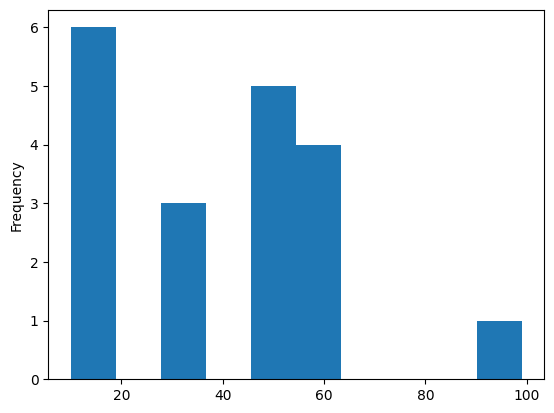

In [91]:
s.plot.hist()  # create a histogram from our series

<AxesSubplot: ylabel='Frequency'>

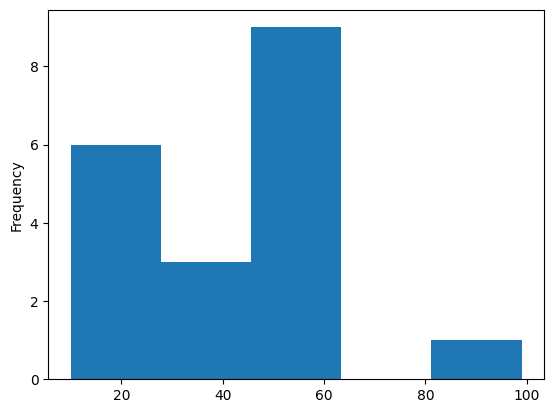

In [92]:
# what if we don't want the default number of bins, which is 10?
# then we can set bins= another number

s.plot.hist(bins=5)

<AxesSubplot: ylabel='Frequency'>

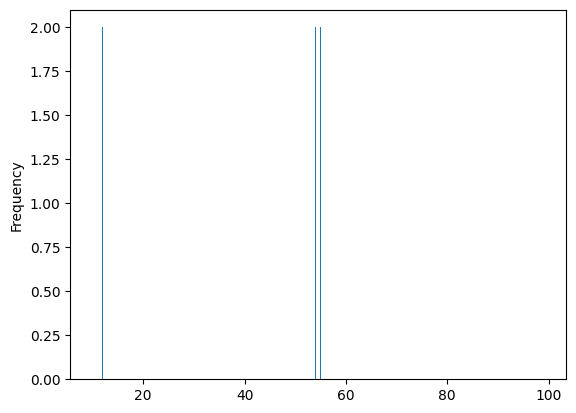

In [94]:
s.plot.hist(bins=1000)

Can you plot multiple histograms from the same data frame, at the same time? Yes, but you shouldn't, unless you specify subplots=True.  That's because multiple histograms will hide one another, and you won't be able to see all of the bars from all of the plots.

# Exercise: Taxi numbers

1. Create a data frame based on the NYC taxi data in January 2019.  We'll want the `tpep_pickup_datetime`, `passenger_count`, `trip_distance`, and `total_amount` columns.
2. Show a histogram for `passenger_count`.  Do we see a normal distribution in the number of passengers?
3. Show a histogram for `trip_distance` and `total_amount` (separately). Do these seem like normal distributions?
4. Show a histogram for the hour of the day at which the trip took place. Does this seem normal?

In [95]:
filename

'../data/nyc_taxi_2019-01.csv'

In [96]:
df = pd.read_csv(filename,
                usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                parse_dates=['tpep_pickup_datetime'])
df

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2019-01-01 00:46:40,1,1.50,9.95
1,2019-01-01 00:59:47,1,2.60,16.30
2,2018-12-21 13:48:30,3,0.00,5.80
3,2018-11-28 15:52:25,5,0.00,7.55
4,2018-11-28 15:56:57,5,0.00,55.55
...,...,...,...,...
7667787,2019-01-31 23:57:36,1,4.79,23.16
7667788,2019-01-31 23:32:03,1,0.00,0.00
7667789,2019-01-31 23:36:36,1,0.00,0.00
7667790,2019-01-31 23:14:53,1,0.00,0.00


<AxesSubplot: ylabel='Frequency'>

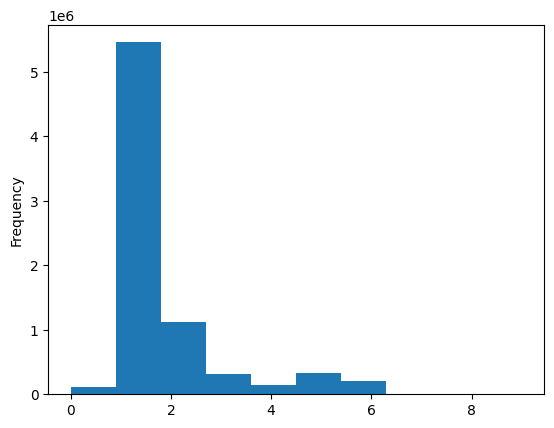

In [97]:
df['passenger_count'].plot.hist()

In [98]:
df['passenger_count'].value_counts()

1    5456121
2    1114106
5     323842
3     314721
6     200811
4     140753
0     117381
8         29
7         19
9          9
Name: passenger_count, dtype: int64

<AxesSubplot: ylabel='Frequency'>

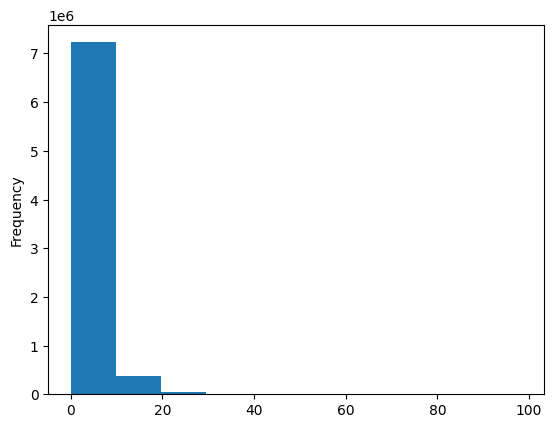

In [107]:
df['trip_distance'].plot.hist()

In [108]:
# get rid of rides that were 40+ miles long
df = df.loc[df['trip_distance'] < 40]

<AxesSubplot: ylabel='Frequency'>

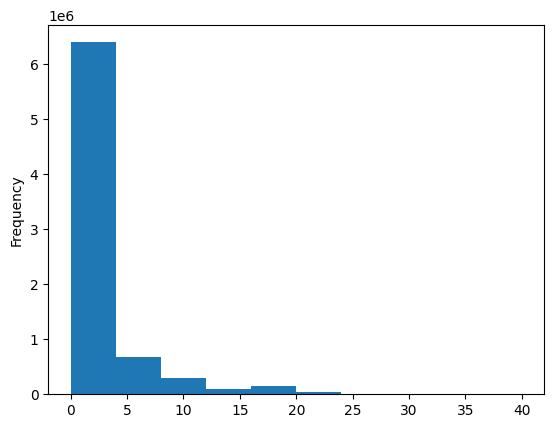

In [109]:
df['trip_distance'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

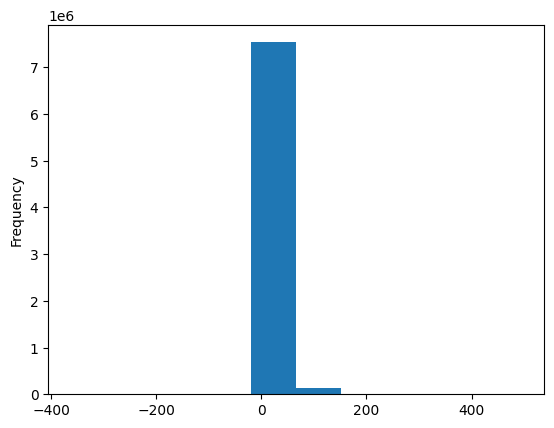

In [111]:
# get rid of rides that were $500+ miles long
df = df.loc[df['total_amount'] < 500]
df['total_amount'].plot.hist()

# Pie plots / pie charts

We'll have numeric data of some sort (e.g., sales broken up by region). We want to see, visually, how much each region's sales have contributed to our bottom line.

In [127]:
df = DataFrame([['US', 120],
                ['Europe', 75],
                ['EMEA', 60],
                ['APAC', 80]],
              columns=['region', 'sales'])

df = df.set_index('region')

df

,sales
region,
US,120
Europe,75
EMEA,60
APAC,80


In [128]:
df['sales'].sum()  # what are the total sales?

335

In [129]:
# I want to know each region's proportion of those sales

df['sales'] / df['sales'].sum()

region
US        0.358209
Europe    0.223881
EMEA      0.179104
APAC      0.238806
Name: sales, dtype: float64

<AxesSubplot: ylabel='sales'>

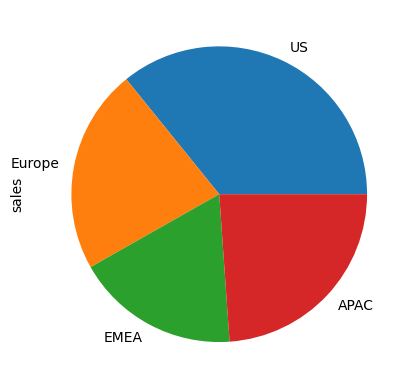

In [130]:
# want to see this graphically -- and the way to do so is with a pie plot

df['sales'].plot.pie()

# How to think about a pie plot

Each of the values in the column/series we want to plot will first be summed. The pie plot will show, graphically, the proportion of that sum from each of the rows.

Imagine creating a pie plot from `total_amount` in our taxi data! Each row (i.e., each taxi ride in our data set) would be one pie slice. That would be unhelpful and unreadable.

It's common to first use `value_counts`, to count how many times each distinct value appears. Then you can use a pie plot on that.

In [131]:
# how *not* to use a pie plot:

df = pd.read_csv('/Users/reuven/Courses/Current/data/albany,ny.csv',
                usecols=[0, 1, 2],
                names=['date', 'maxtemp', 'mintemp'],
                header=0,
                parse_dates=[0],
                index_col='date')
df.head()

,maxtemp,mintemp
date,,
2018-12-11 00:00:00,-2,-8
2018-12-11 03:00:00,-2,-8
2018-12-11 06:00:00,-2,-8
2018-12-11 09:00:00,-2,-8
2018-12-11 12:00:00,-2,-8


<AxesSubplot: ylabel='maxtemp'>

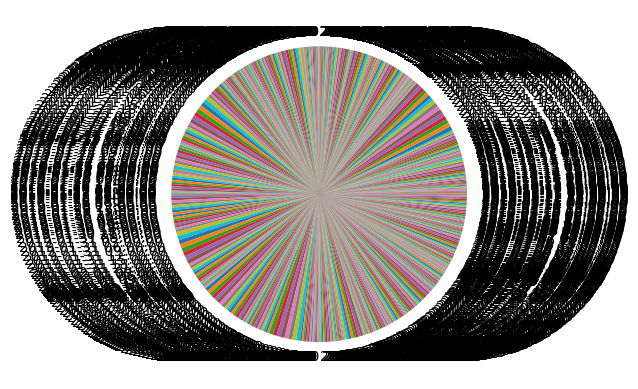

In [133]:
# this will show, for each temperature reading, the reading's contribution to the total temperature

df['maxtemp'].abs().plot.pie()  

# Exercise: Taxi pie plots

1. Create a pie plot showing how often each number of passengers takes a ride.
2. Take the values for `trip_distance`. Based on these, create a new column, `trip_category`, which will have values `short`, `medium`, and `long`. Short trips are < 3 miles, long trips are > 10 miles, and medium trips are all the rest. Show a pie plot indicating how often each length of trip occurs.

In [137]:
df = pd.read_csv(filename,
                usecols=['trip_distance', 'passenger_count'])
df.head()

,passenger_count,trip_distance
0,1,1.5
1,1,2.6
2,3,0.0
3,5,0.0
4,5,0.0


<AxesSubplot: ylabel='passenger_count'>

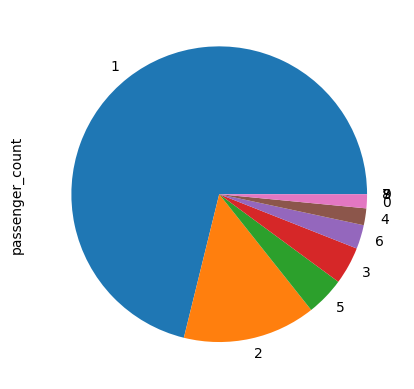

In [139]:
# do not do this:

df['passenger_count'].value_counts().plot.pie()

In [140]:
# Take the values for trip_distance. 
# Based on these, create a new column, trip_category, 
# which will have values short, medium, and long. 
# Short trips are < 3 miles, long trips are > 10 miles, 
# and medium trips are all the rest. Show a pie plot indicating how often each length of trip occurs.

df['trip_category'] = 'medium'

In [143]:
df.loc[df['trip_distance'] < 3, 'trip_category'] = 'short'

In [144]:
df.loc[df['trip_distance'] > 10, 'trip_category'] = 'long'

In [145]:
df['trip_category']

0           short
1           short
2           short
3           short
4           short
            ...  
7667787    medium
7667788     short
7667789     short
7667790     short
7667791     short
Name: trip_category, Length: 7667792, dtype: object

<AxesSubplot: ylabel='trip_category'>

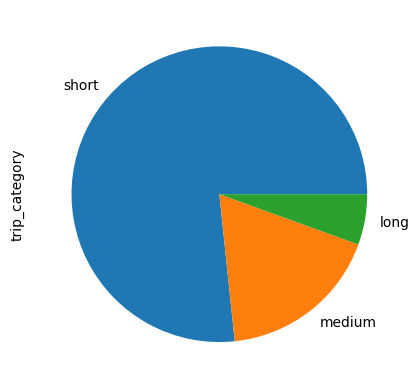

In [147]:
df['trip_category'].value_counts().plot.pie()

# Next up:

Scatter plots!

# Scatter plot

In many cases, our data analysis will be helped if we can compare two different values, plotting them against one another. Often, we'll take two different columns from the same data frame and plot them in this way, putting one on the x axis and the other on the y axis.  This allows us to see (visually) if there is any correlation between the two.

Loosely defined a correlation can be positive (meaning that if one goes up, the other goes up), or negative (meaning that if one goes up, the other goes down). Correlations are measured on a scale of -1 to 0 to 1.

- If the correlation is -1, that's a negative correlation.  As the number of cars increases, the number of people riding on horses decreases.  That's probably (without checking) true, and a strong negative correlation.

- If the correlation is +1, then that's a strong positive.  As the number of gasoline-powered cars increases, the number of barrels of oil we need to produce goes up.  That's probably (without checking) true, and a strong positive correlation.

- If the correlation is 0, then there isn't any connection between the two.  For example, the number of cups of tea that I drink a day has a 0 correlation with the number of barrels of oil that Japan imports on that same day.

Most correlations will not be -1, 0, or 1, but will be between those numbers -- somewhat positive or somewhat negative. The closer to -1 or 1, the stronger the correlation.

In [148]:
df = pd.read_csv('/Users/reuven/Courses/Current/data/albany,ny.csv')
df.head()


,date_time,"albany,ny_maxtempC","albany,ny_mintempC","albany,ny_totalSnow_cm","albany,ny_sunHour","albany,ny_uvIndex","albany,ny_uvIndex.1","albany,ny_moon_illumination","albany,ny_moonrise","albany,ny_moonset",...,"albany,ny_WindChillC","albany,ny_WindGustKmph","albany,ny_cloudcover","albany,ny_humidity","albany,ny_precipMM","albany,ny_pressure","albany,ny_tempC","albany,ny_visibility","albany,ny_winddirDegree","albany,ny_windspeedKmph"
0,2018-12-11 00:00:00,-2,-8,0.0,8.7,2,0,21,10:31 AM,08:22 PM,...,-5,2,9,67,0.0,1023,-5,10,309,1
1,2018-12-11 03:00:00,-2,-8,0.0,8.7,2,0,21,10:31 AM,08:22 PM,...,-6,4,18,68,0.0,1023,-6,10,173,2
2,2018-12-11 06:00:00,-2,-8,0.0,8.7,2,0,21,10:31 AM,08:22 PM,...,-7,2,14,68,0.0,1023,-8,10,168,1
3,2018-12-11 09:00:00,-2,-8,0.0,8.7,2,2,21,10:31 AM,08:22 PM,...,-3,3,8,55,0.0,1021,-4,10,207,3
4,2018-12-11 12:00:00,-2,-8,0.0,8.7,2,2,21,10:31 AM,08:22 PM,...,-2,4,3,50,0.0,1017,-2,10,189,3


In [153]:
# scatter plot of temperatures (and other things) in Albany.

df = pd.read_csv('/Users/reuven/Courses/Current/data/albany,ny.csv',
                usecols=[0, 1, 2, 3, 4],
                names=['date', 'maxtemp', 'mintemp', 'snow', 'sunhour'],
                header=0,
                parse_dates=[0],
                index_col='date')
df.head()

,maxtemp,mintemp,snow,sunhour
date,,,,
2018-12-11 00:00:00,-2,-8,0.0,8.7
2018-12-11 03:00:00,-2,-8,0.0,8.7
2018-12-11 06:00:00,-2,-8,0.0,8.7
2018-12-11 09:00:00,-2,-8,0.0,8.7
2018-12-11 12:00:00,-2,-8,0.0,8.7


<AxesSubplot: xlabel='mintemp', ylabel='maxtemp'>

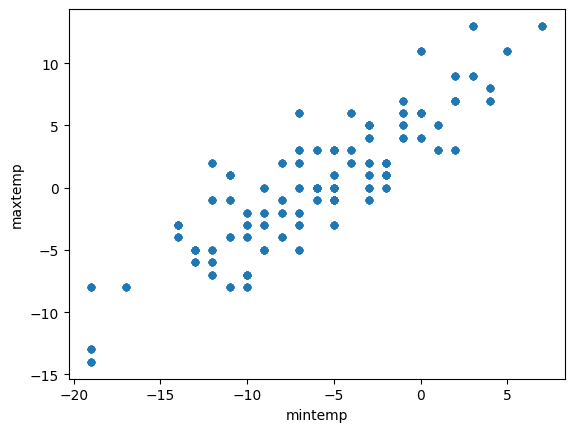

In [154]:
# let's plot mintemp vs. maxtemp

df.plot.scatter(x='mintemp', y='maxtemp')

<AxesSubplot: xlabel='mintemp', ylabel='snow'>

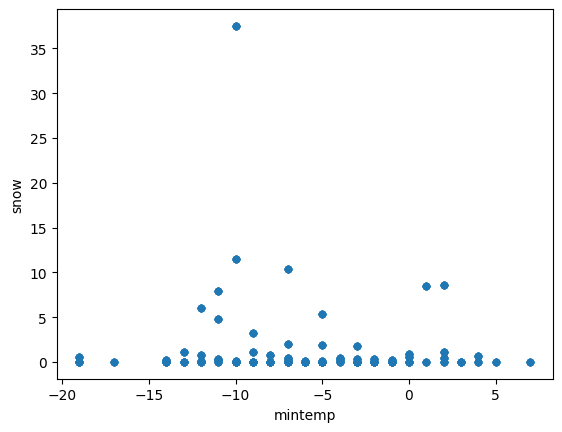

In [155]:
df.plot.scatter(x='mintemp', y='snow')

<AxesSubplot: xlabel='sunhour', ylabel='maxtemp'>

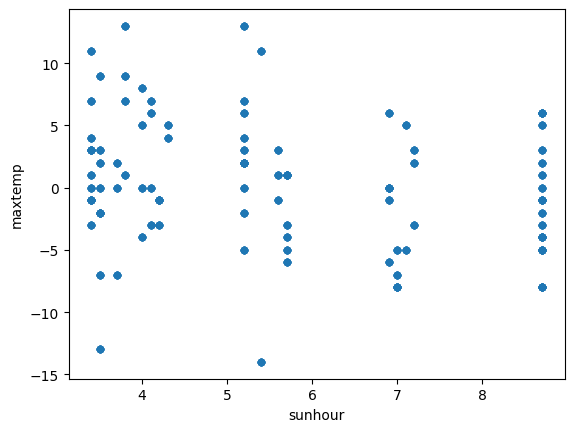

In [157]:
df.plot.scatter(x='sunhour', y='maxtemp')

# Exercise: Taxi correlations

1. Load the taxi data with our favorite columns: `passenger_count`, `trip_distance`, `total_amount`.
2. Create a scatter plot comparing `trip_distance` and `total_amount`. What is your intiution before plotting?  What do you think of the plot?
2. Create a scatter plot comparing `trip_distance` and `passenger_count`. What is your intiution before plotting?  What do you think of the plot?

In [158]:
filename

'../data/nyc_taxi_2019-01.csv'

<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

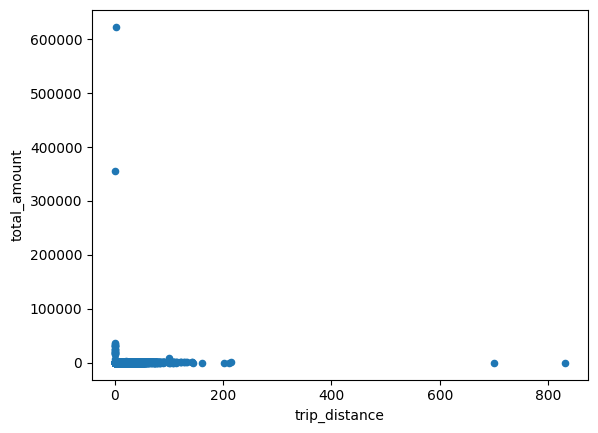

In [159]:
df = pd.read_csv(filename,
                usecols=['passenger_count', 'trip_distance', 'total_amount'])

# scatter plot between trip_distance and total_amount
# my intuition is: the farther you go in a taxi, the more you have to pay
# I would expect to see a strongly positive correlation -- meaning, a diagonal up and to the right

df.plot.scatter(x='trip_distance', y='total_amount')

In [160]:
df = df.loc[df['total_amount'] < 1000]
df = df.loc[df['trip_distance'] < 200]


<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

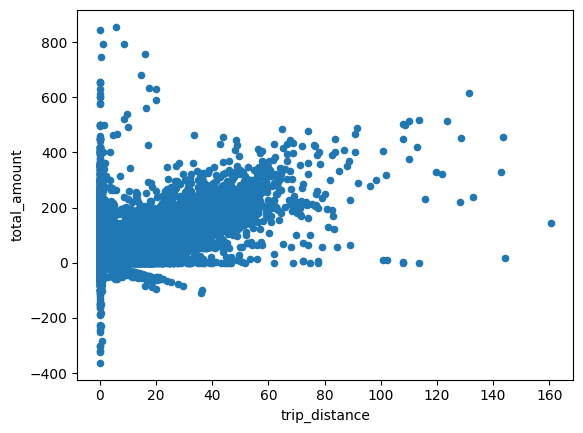

In [161]:
df.plot.scatter(x='trip_distance', y='total_amount')

In [163]:
df = df.loc[df['total_amount'] > 0]
df = df.loc[df['trip_distance'] > 0]


<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

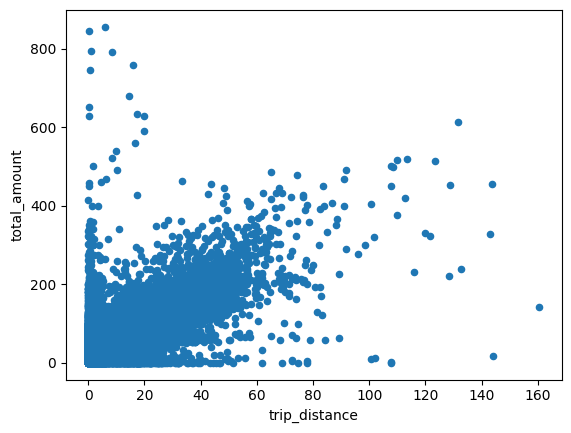

In [164]:
df.plot.scatter(x='trip_distance', y='total_amount')

<AxesSubplot: xlabel='trip_distance', ylabel='passenger_count'>

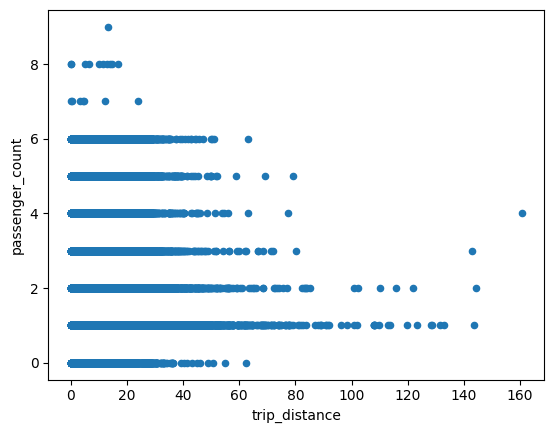

In [165]:
# now let's create a scatter plot between trip_distance and passenger_count

# if a taxi driver sees 1 person waiting for a taxi and also 4 people waiting for a taxi,
# who should they pick up to maximize revenue?

df.plot.scatter(x='trip_distance', y='passenger_count')

In [166]:
df.corr()    # this shows us the correlation between every two columns

,passenger_count,trip_distance,total_amount
passenger_count,1.000000,0.007079,0.004367
trip_distance,0.007079,1.000000,0.933467
total_amount,0.004367,0.933467,1.000000


<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

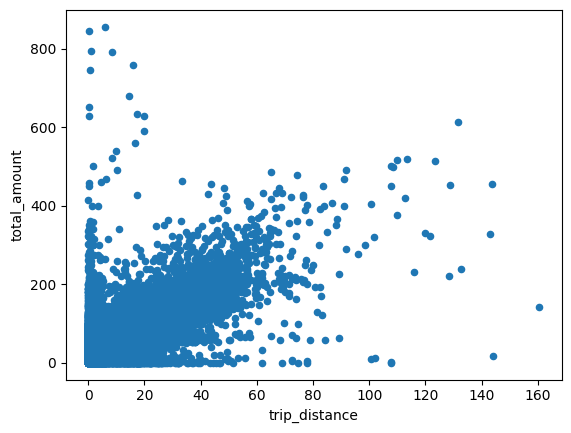

In [167]:
# let's again plot trip_distance vs. total_amount

df.plot.scatter(x='trip_distance', y='total_amount')

In [168]:
# I'd like to customize the color of each dot
# the dot's color should reflect the value of passenger_count for that ride

df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count')

<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

Error in callback <function _draw_all_if_interactive at 0x122a9ae80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x122e8a980> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

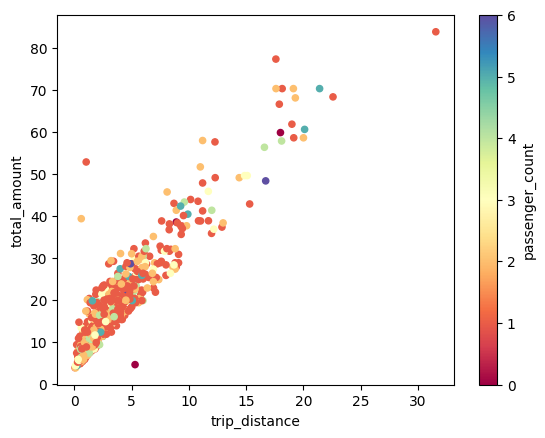

In [170]:
df[:1000].plot.scatter(x='trip_distance', 
                       y='total_amount', 
                       c='passenger_count',
                      colormap='Spectral')

ValueError: 'Spasdfafafafafafafectral' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

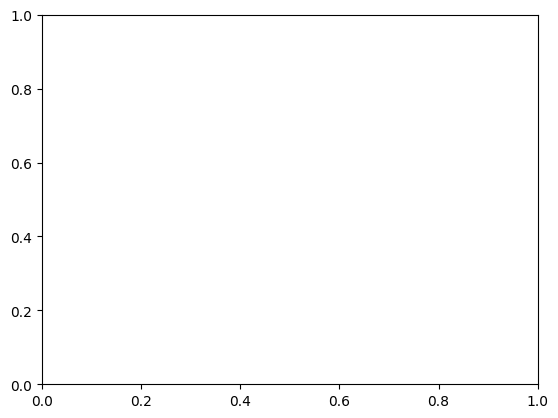

In [171]:
df[:1000].plot.scatter(x='trip_distance', 
                       y='total_amount', 
                       c='passenger_count',
                      colormap='Spasdfafafafafafafectral')

<AxesSubplot: xlabel='trip_distance', ylabel='total_amount'>

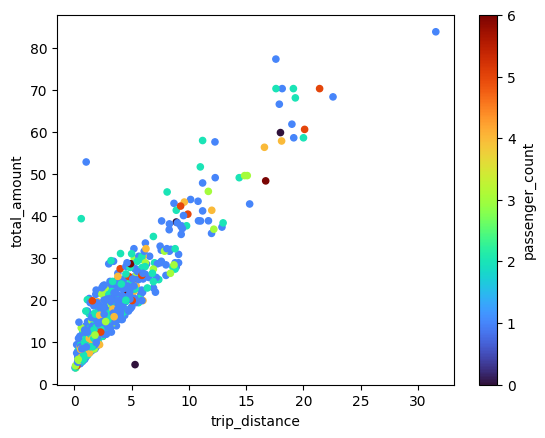

In [172]:
df[:1000].plot.scatter(x='trip_distance', 
                       y='total_amount', 
                       c='passenger_count',
                      colormap='turbo')

# Exercise: Tipping in color

1. Create a data frame from Jan 2019 taxi rides, with: `trip_distance`, `total_amount`, and `tip_amount`.
2. Add a new column, `tip_percentage`, and assign it the value of `tip_amount` / `total_amount`.
3. Create a scatter plot comparing `total_amount` and `tip_amount` for the first 1,000 rows in the data frame.
4. Add the color from `tip_percentage`.

In [173]:
filename

'../data/nyc_taxi_2019-01.csv'

In [ ]:
df = pd.read_csv(filename, 
                usecols=['trip_distance', 'total_amount', 'tip_amount'])

df['tip_percentage'] = df['tip_amount'] / df['total_amount']